In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import folium
from folium.plugins import HeatMap

In [2]:
accidents = pd.read_csv('uk_road_accident.csv')
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data type correction and Filling null values</h1>

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accidents['Index'] = accidents['Index'].astype('category')
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Accident Date'] = accidents['Accident Date'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('object')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('object')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

In [5]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna('Undetermined')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('Undetermined')

In [7]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Date Time Conversion </h1>

In [8]:
accidents['Accident Date'] = accidents['Accident Date'].astype(str)
accidents['Accident Date'] = accidents['Accident Date'].str.strip()
accidents['Accident Date'] = accidents['Accident Date'].str.replace('/', '-')

In [9]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst=True, errors='coerce')

In [10]:
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Year'] = accidents['Accident Date'].dt.year

<h1>20 Questions and insights</h1>
<hr>

<h1>UNIVARIATE ANALYSIS</h1>

<h3>Which district area has the highest number of accidents?</h3>

In [11]:
accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Insights #1</h3>
<h4>The Top 5 accident prone District Areas are Birmingham, Leeds, Manchester, Bradford and Sheffield</h4>
<hr>

<h3>Which road type has the most accidents?</h3>

In [12]:
accidents['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Undetermined            4520
Name: count, dtype: int64

<h3>Insights #2</h3>
<h4>The Top 5 accident prone Road Types in this particular order; are Single Carriageway, Dual Carriageway, Roundabout, One way street and Slip road</h4>
<hr>

<h3>Which vehicle type is involved most often in accidents?</h3>

In [13]:
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3>Insights #3</h3>
<h4>The 5 vehicles that are most involved in UK road accidents are Cars, Vans, Buses, Motorcycles(over 500cc) and Taxis. With the Cars having a majority and huge number difference with the rest of the list.</h4>
<hr>

<h3>Which light condition has the highest number of accidents?</h3>

In [14]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insights #4</h3>
<h4>Most accidents in the UK happens under broad daylight, with its results having a visble margin with the next highest, dimlighted darkness.</h4>
<hr>

<h3>Which weather condition is most common during accidents?</h3>

In [15]:
accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Undetermined              14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3>Insights #5</h3>
<h4>There seem to be a very visible gap between the results of 'Fine no high winds' and the rest of the list. A bit  bizzarre considering many people believe that high winds contribute more to accidents on the road.</h4>
<hr>

<h3>On which date do most accidents occur and what accident on that particular date has the most number of casualties?</h3>

In [16]:
print(accidents['Accident Date'].mode()[0])

2019-11-30 00:00:00


In [17]:
datemostaccidents = accidents[accidents['Accident Date'] == '30-11-2019'] 
datemostaccidents['Accident Date'].value_counts()

Accident Date
2019-11-30    704
Name: count, dtype: int64

In [18]:
print(datemostaccidents['Number_of_Casualties'].max())

6


In [19]:
datemostaccidents[datemostaccidents['Number_of_Casualties'] == 6]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year
12057,200701PY20385,Serious,2019-11-30,51.406871,Darkness - lights lit,Bromley,-0.006341,6,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Bus or coach (17 or more pass seats),30,11,2019
69853,200720D330401,Slight,2019-11-30,52.487428,Darkness - lights lit,Birmingham,-1.831786,6,2,Wet or damp,Single carriageway,Urban,Raining + high winds,Goods 7.5 tonnes mgw and over,30,11,2019


<h3>Insights #6</h3>
<h4>Most number of accidents in the UK occured on the 30th of November, 2019. With 704 reported accidents that came from different districts for that single date alone.</h4>
<hr>
<h3>Insights #7</h3>
<h4>Of the 704 accidents, 2 of them had the highest casualty of 6 individuals, one having a severity of "Serious" and the other "Slight". Involved vehicles the accidents includes a Bus and Goods Dealer Truck. </h4>
<hr>
<h3>Insights #8</h3>
<h4>Both accidents happend in dark lighted conditions, having rain and one with highwinds. Both accidents were also driving on wet or damp road conditions. Given the vehicles involved in these accidents, they're likely more prone to slipping on damp and wet roads</h4>
<hr>

<h1>BIVARIATE ANALYSIS</h1>

<h3>Do urban or rural areas report more accidents overall and what are their most prominent severity?</h3>

In [20]:
ruralaccidents = accidents[accidents['Urban_or_Rural_Area'] == 'Rural']
ruralaccidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          238990
Unallocated         0
Urban               0
Name: count, dtype: int64

In [21]:
urbanaccidents = accidents[accidents['Urban_or_Rural_Area'] == 'Urban']
urbanaccidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural               0
Unallocated         0
Name: count, dtype: int64

In [22]:
accident_counts = accidents.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts().unstack()
accident_counts

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,5601,37312,196077
Unallocated,0,1,10
Urban,3060,50904,367714


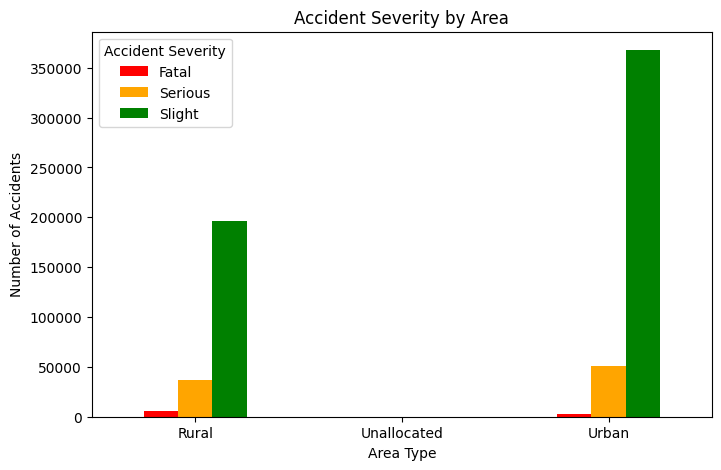

In [23]:
accident_counts.plot(kind='bar', figsize=(8,5), color=['red', 'orange', 'green'])

plt.title("Accident Severity by Area")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Accident Severity")
plt.show()

<h3>Insights #9</h3>
<h4> Results of the analysis shows that Urban areas yield more accidents overall across UK, but it is important to note that this value can be affected by other factors, like the sheer volume of vehicles in urban areas.</h4>
<hr>
<h3>Insights #10</h3>
<h4> The noticeable severity of the accidents in both rural and urban falls in "Slight", a wide difference between their results, but shows that accidents in the UK often has minor severity.</h4>
<hr>
<h3>Insights #11</h3>
<h4> The interesting take from this analysis is that Rural areas yielded more "Fatal" accidents overall. Despite the mentioned factor that Urban areas may outweigh Rural areas in vehicle volumes. This could indicate that terrain, road conditions or even wheather conditions on Rural areas may have more relation with these results.</h4>
<hr>

<h3>Do weather conditions affect the severity of accidents?</h3>

In [24]:
weather_accidents = accidents.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()
weather_accidents

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7100,72046,441739
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637
Undetermined,107,1239,12782


In [25]:
A = accidents['Accident_Severity'].value_counts().sum()
W = accidents['Weather_Conditions'].value_counts().sum()


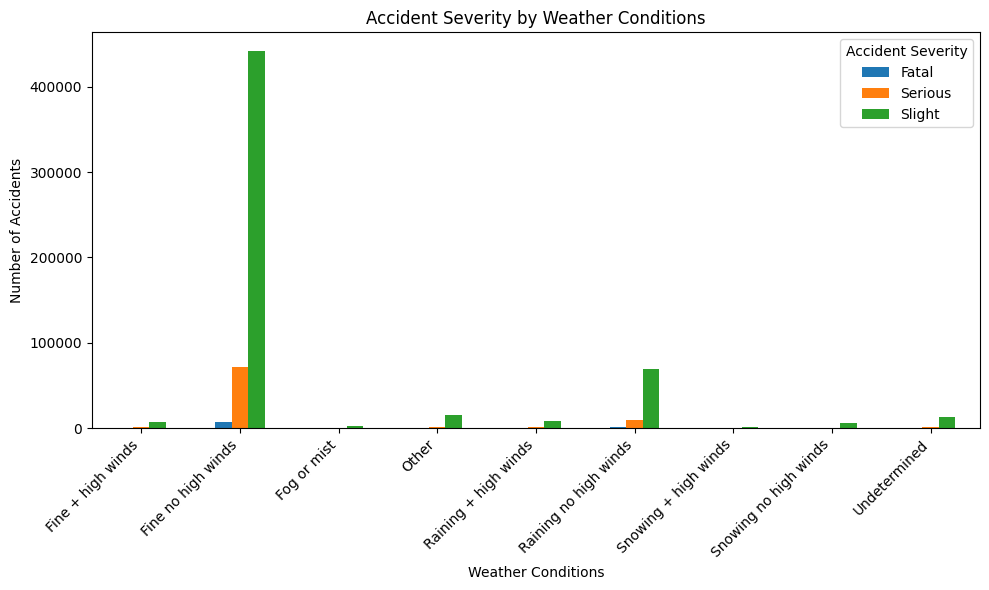

In [26]:
weather_accidents.plot(kind='bar', figsize=(10,6))
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h3>Insights #12</h3>
<h4> Results of the analysis shows very big outliers which skewed the previous result. Here the outlier ("Slight") is remove temporarily, and as presented, most "Serious" and "Fatal" accidents happen on the weather condition "Fine no high winds"</h4>
<hr>
<h3>Insights #13</h3>
<h4> The "Fine no high winds" yielded over 70k Serious accidents and over 7k Fatal ones. These numbers are significantly bigger than the rest of the weather conditions with recorded accidents</h4>
<hr>
<h3>Insights #14</h3>
<h4>These results could indicate that perhaps, harsh weather conditions in UK, which includes: fog, rain, snow and highwinds, contribute little to how severe an accident occurs. Of course, this is the broad and overall analysis of UK accidents, these results may differ in district areas.</h4>
<hr>

<h3>Which Districts have the most numbers of Fatal accidents</h3>

In [27]:
fatal_districts = accidents[accidents['Accident_Severity'] == 'Fatal']

In [28]:
fd = (
    accidents[accidents['Accident_Severity'] == 'Fatal']
    .groupby('District Area').size()
    .reset_index(name='Fatal Count')
    .sort_values(by='Fatal Count', ascending=False)
    .head(10)
)
print(fd)

                District Area  Fatal Count
24                 Birmingham          105
195                     Leeds           93
172                  Highland           88
124  East Riding of Yorkshire           85
36                   Bradford           71
1               Aberdeenshire           66
268                     Powys           59
105                 Doncaster           56
379                 Wakefield           56
169  Herefordshire, County of           51


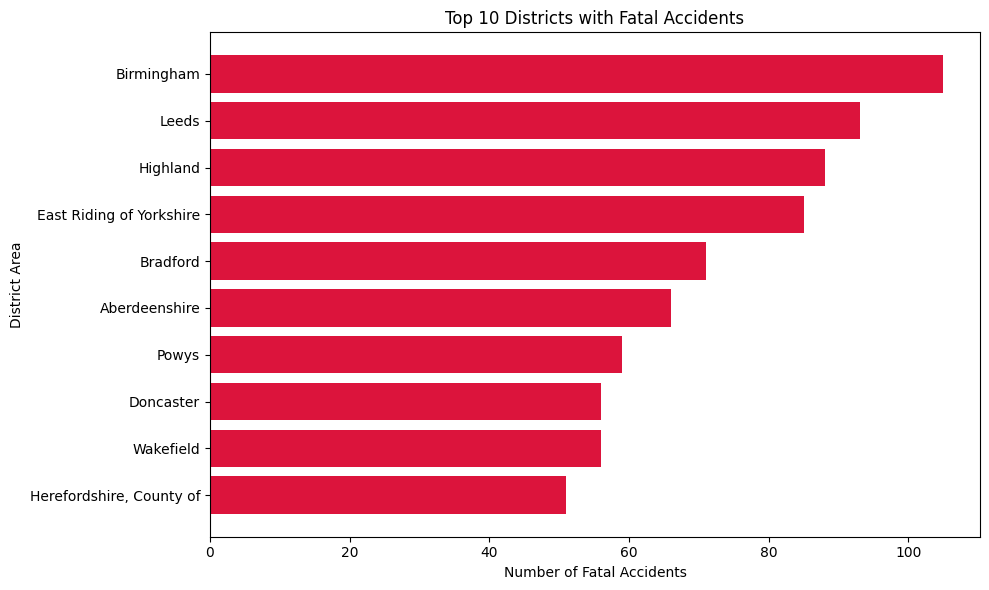

In [29]:
plt.figure(figsize=(10,6))
plt.barh(fd['District Area'], fd['Fatal Count'], color='crimson')

plt.xlabel("Number of Fatal Accidents")
plt.ylabel("District Area")
plt.title("Top 10 Districts with Fatal Accidents")
plt.gca().invert_yaxis()  # largest at the top
plt.tight_layout()
plt.show()

<h3>Insights #16</h3>
<h4> The highest recorded Fatal accidents occured in Birmingham, with over 105 reported cases of Fatal accidents.</h4>
<hr>
<h3>Insights #17</h3>
<h4> The 10 districts presented above yielded more than 50 Fatal accidents in a span of a few years. These accidents could indicate large numbers of casualties per district.</h4>
<hr>
<h3>Insights #18</h3>
<h4>These results could also indicate that the involved vehicles in such Fatal accidents are public transporation vehicles, which significantly carry more people and increased risk.</h4>
<hr>

<h3>What vehicle is most involved in fatal accidents yearly aside from cars?</h3>

In [30]:
fatal_non_cars = accidents[
    (accidents['Accident_Severity'] == 'Fatal') &
    (accidents['Vehicle_Type'] != 'Car')
]

fatal_trends = (
    fatal_non_cars.groupby(['Year', 'Vehicle_Type']).size().reset_index(name='Fatal Count')
    .sort_values(by=['Year', 'Fatal Count'], ascending=[True, False])
)

print(fatal_trends.head(20))

    Year                           Vehicle_Type  Fatal Count
1   2019   Bus or coach (17 or more pass seats)          152
15  2019    Van / Goods 3.5 tonnes mgw or under          140
10  2019                  Motorcycle over 500cc          107
4   2019          Goods 7.5 tonnes mgw and over          106
7   2019             Motorcycle 125cc and under           76
14  2019                  Taxi/Private hire car           50
9   2019  Motorcycle over 125cc and up to 500cc           37
8   2019              Motorcycle 50cc and under           35
5   2019        Goods over 3.5t. and under 7.5t           26
11  2019                          Other vehicle           15
6   2019       Minibus (8 - 16 passenger seats)           11
0   2019                   Agricultural vehicle            7
12  2019                            Pedal cycle            4
2   2019                                    Car            0
3   2019           Data missing or out of range            0
13  2019                

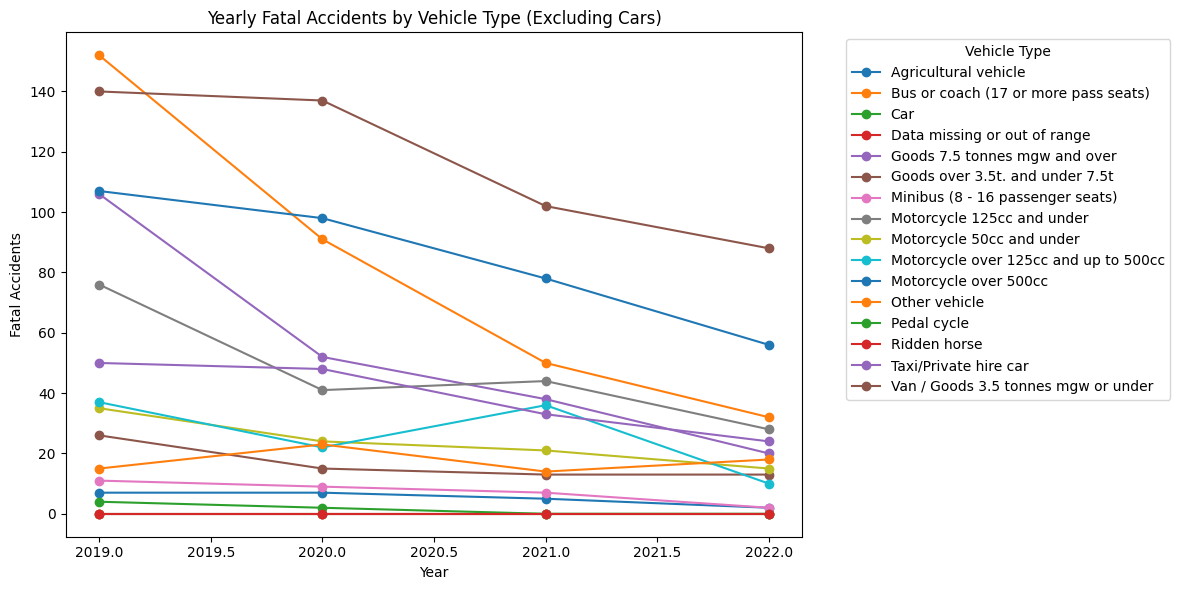

In [31]:
fatal_pivot = fatal_trends.pivot(index='Year', columns='Vehicle_Type', values='Fatal Count')

fatal_pivot.plot(kind='line', marker='o', figsize=(12,6))

plt.xlabel("Year")
plt.ylabel("Fatal Accidents")
plt.title("Yearly Fatal Accidents by Vehicle Type (Excluding Cars)")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h3>Insights #19</h3>
<h4> Large buses are highly involved in fatal accidents. In 2019, buses or coaches (17+ seats) had the highest fatal accident count (152), surpassing all other vehicle types. This suggests that public transport vehicles contribute significantly to fatalities, possibly due to their size and passenger capacity.</h4>
<hr>
<h3>Insights #20</h3>
<h4> Vans/Goods under 3.5 tonnes show very high fatal accident counts in both 2019 and 2020. This consistency highlights that smaller goods vehicles (delivery vans, light trucks) are a persistent safety risk year to year.</h4>
<hr>
<h3>Insights #21</h3>
<h4>Motorcycles (especially larger ones) are a major fatality risk. In 2019, motorcycles over 500cc caused 107 fatalities, while smaller motorcycles (50cc–500cc) still contributed significantly (total ~148 combined). In 2020, large motorcycles remained a leading cause with 98 fatalities, making them a consistent high-risk vehicle type.</h4>
<hr>

<h3>Is there a relationship between Fatal Accidents and the Number of Casualties within the Top 10 Districts with most Fatal Accidents?</h3>

In [32]:
fatal = accidents[accidents['Accident_Severity'] == 'Fatal']

In [33]:
corr = fatal['Number_of_Casualties'].corr(fatal['Number_of_Vehicles'])
print("Correlation between Fatal Accidents and Number of Casualties:", corr)

Correlation between Fatal Accidents and Number of Casualties: 0.26821288362470547


In [34]:
top10_districts = (
    fatal.groupby('District Area').size()
    .reset_index(name='Fatal Count')
    .sort_values(by='Fatal Count', ascending=False)
    .head(10)
)
print(top10_districts)

                District Area  Fatal Count
24                 Birmingham          105
195                     Leeds           93
172                  Highland           88
124  East Riding of Yorkshire           85
36                   Bradford           71
1               Aberdeenshire           66
268                     Powys           59
105                 Doncaster           56
379                 Wakefield           56
169  Herefordshire, County of           51


In [35]:
district_stats = (
    fatal.groupby('District Area')
    .agg(Fatal_Count=('Accident_Severity', 'count'),
         Total_Casualties=('Number_of_Casualties', 'sum'))
    .reset_index()
    .sort_values(by='Fatal_Count', ascending=False)
    .head(10)
)

print(district_stats)

                District Area  Fatal_Count  Total_Casualties
24                 Birmingham          105               182
195                     Leeds           93               175
172                  Highland           88               213
124  East Riding of Yorkshire           85               185
36                   Bradford           71               133
1               Aberdeenshire           66               120
268                     Powys           59               124
105                 Doncaster           56               112
379                 Wakefield           56               104
169  Herefordshire, County of           51               103


In [36]:
district_stats = (
    fatal.groupby('District Area')
    .agg(Fatal_Count=('Accident_Severity', 'count'),
         Total_Casualties=('Number_of_Casualties', 'sum'))
    .reset_index()
    .sort_values(by='Fatal_Count', ascending=False)
    .head(10)
)

print(district_stats)

                District Area  Fatal_Count  Total_Casualties
24                 Birmingham          105               182
195                     Leeds           93               175
172                  Highland           88               213
124  East Riding of Yorkshire           85               185
36                   Bradford           71               133
1               Aberdeenshire           66               120
268                     Powys           59               124
105                 Doncaster           56               112
379                 Wakefield           56               104
169  Herefordshire, County of           51               103


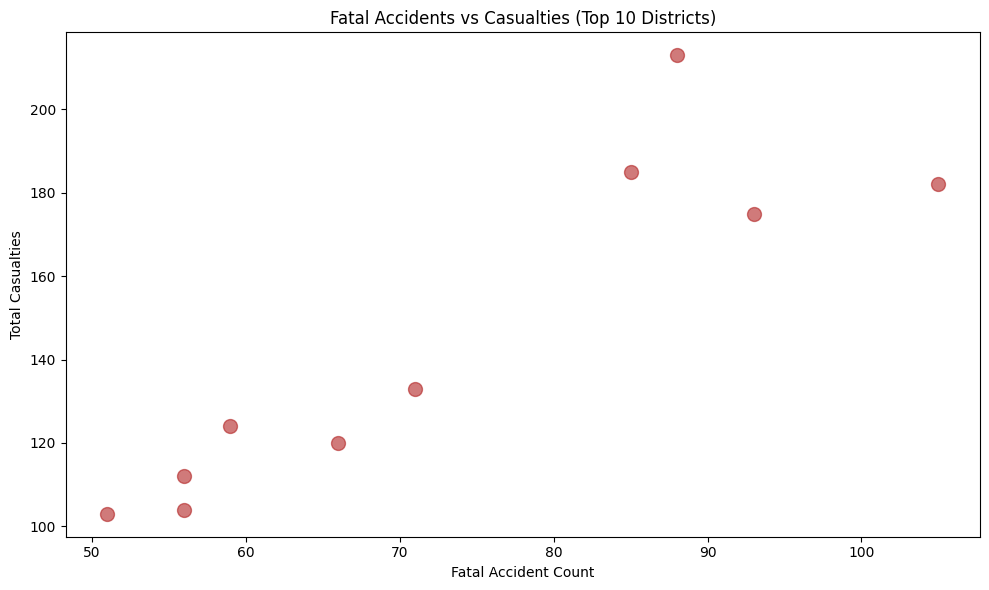

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(
    district_stats['Fatal_Count'],
    district_stats['Total_Casualties'],
    s=100, alpha=0.6, color="firebrick"
)

plt.xlabel("Fatal Accident Count")
plt.ylabel("Total Casualties")
plt.title("Fatal Accidents vs Casualties (Top 10 Districts)")

plt.tight_layout()
plt.show()

<h3>Insights #21</h3>
<h4> High fatal accidents correlate with high casualties – Districts like Highland (88 fatal accidents, 213 casualties) and East Riding of Yorkshire (85 fatal accidents, 185 casualties) show that as fatal accidents rise, the number of casualties tends to rise as well.</h4>
<hr>
<h3>Insights #22</h3>
<h4>Highland stands out for casualty severity – Despite not having the highest number of fatal accidents, Highland records the largest casualty count (213), suggesting its fatal accidents are often more severe in terms of casualties per accident.</h4>
<hr>
<h3>Insights #23</h3>
<h4>Urban places like Birmingham and Leeds lead in fatal accidents – Birmingham tops the list with 105 fatalities and 182 casualties, closely followed by Leeds with 93 fatalities and 175 casualties, highlighting that larger urban areas face greater fatal accident risks.</h4>
<h3>Insights #25</h3>
<h4>Smaller districts still face significant impact – Areas like Powys (59 fatalities, 124 casualties) and Herefordshire (51 fatalities, 103 casualties) may not rank as high in raw fatal accident numbers, but the casualty counts suggest serious consequences even in less densely populated regions.</h4>
<hr>

In [38]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h3>What is the distribution of accident severity in the Highland District Area?</h3>

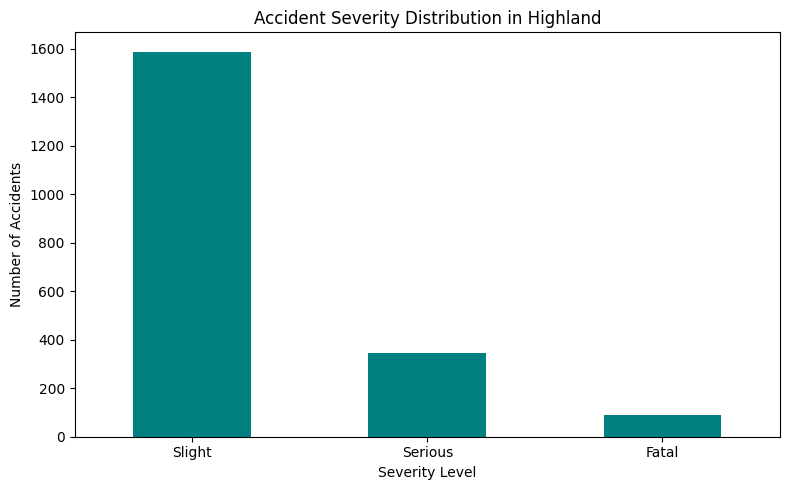

In [39]:
highland_data = accidents[accidents['District Area'] == "Highland"]
severity_counts = highland_data['Accident_Severity'].value_counts()

severity_counts.plot(kind="bar", color="teal", figsize=(8,5))
plt.title("Accident Severity Distribution in Highland")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h3>Insights #26</h3>
<h4> Slight and serious accidents dominate the Highland district compared to fatal ones.</h4>
<hr>
<h3>Insights #27</h3>
<h4>The proportion highlights higher accident frequency but lower fatality risk.</h4>
<hr>
<h3>Insights #28</h3>
<h4>This distribution suggests strong emergency response and road safety enforcement.</h4>
<hr>

<h3>What is the accident severity distribution in Aberdeen District (2021)?</h3>

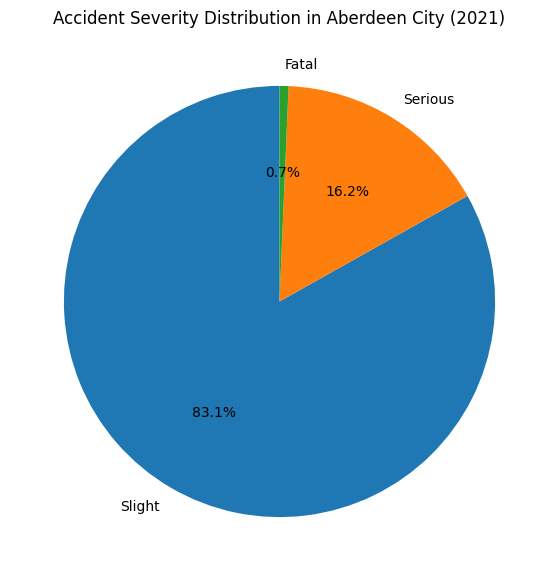

In [40]:
aberdeen_data = accidents[(accidents['District Area'] == "Aberdeen City") & (accidents['Year'] == 2021)]
severity_counts = aberdeen_data['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels=severity_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Aberdeen City (2021)')
plt.show()

<h3>Insights #29</h3>
<h4> The majority of accidents in Aberdeen City during 2021 were classified as slight.</h4>
<hr>
<h3>Insights #30</h3>
<h4>Serious accidents make up a much smaller share compared to slight ones.</h4>
<hr>
<h3>Insights #31</h3>
<h4>Fatal accidents, while rare, highlight critical safety concerns in the district.</h4>
<hr>

<h3>What are the accident patterns in the Glasgow District Area?</h3>

In [42]:
Glasgow_df = accidents[accidents['District Area'] == 'Glasgow City']
loc2 = list(zip(Glasgow_df['Latitude'], Glasgow_df['Longitude']))
Glasgow_map = folium.Map(location=[Glasgow_df['Latitude'].mean(), Glasgow_df['Longitude'].mean()], zoom_start=10)
HeatMap(loc2).add_to(Glasgow_map)
Glasgow_map.save("glasgow_heatmap.html")
Glasgow_map

<h3>Insights #32</h3>
<h4>A strong concentration of accidents is observed in central Glasgow, particularly around commercial and shopping districts, reflecting dense traffic congestion and pedestrian activity. </h4>
<hr>
<h3>Insights #33</h3>
<h4>The outskirts of Glasgow experience fewer accidents, but hotspots still appear along major arterial routes and ring roads that feed into the city center.</h4>
<hr>
<h3>Insights #34</h3>
<h4>Accident density aligns closely with the M8 motorway and other major highways, indicating that heavy commuter and freight traffic contribute to higher collision risks along these corridors. </h4>
<hr>

<h3>What is the accident distribution in the Aberdeen District Area?</h3>

In [43]:
Aberdeen_df = accidents[accidents['District Area'] == 'Aberdeen City']
loc3 = list(zip(Aberdeen_df['Latitude'], Aberdeen_df['Longitude']))
Aberdeen_map = folium.Map(location=[Aberdeen_df['Latitude'].mean(), Aberdeen_df['Longitude'].mean()], zoom_start=10)
HeatMap(loc3).add_to(Aberdeen_map)
Aberdeen_map.save("aberdeen_heatmap.html")
Aberdeen_map

<h3>Insights #35</h3>
<h4>Accidents cluster heavily along commuter routes leading into Aberdeen, such as the A96 and A92, reflecting their role as high-traffic corridors during rush hours.</h4>
<hr>
<h3>Insights #36</h3>
<h4>Suburban and rural areas around the city show a much lower density of accidents, indicating reduced traffic flow and fewer high-risk interactions.</h4>
<hr>
<h3>Insights #37</h3>
<h4>Hotspots in the city center correspond to busy junctions and roundabouts, where merging traffic and stop-and-go movement significantly increase collision risk.</h4>
<hr>